# Regression

## Abstract

The aim of this assignment is to perform Linear, Logistic, Ridge Regressions on the airbnb Dataset in order to find the best model to predict the price of the airbnb listings.

Going forward while creating a predictive models it is made sure to avoid multicollinearity and interaction effect of independent predictors is added to study strength of influence on the price of listings.

Predictive models are developed using below approach:
1. Linear Regression
2. Logistic Regression
3. Regularization
4. MultiCollinearity
5. Interaction Effect

The price trend for various predictors like property_type, room_type, bed_type, bathrooms, beds and customer ratings is being analysed.

Design & Development of predictive Models are divided into 5 stages:
1. Data Collection.
2. Exploratory Data Ananlysis.
3. Data Wrangling.
4. Model Design
5. Comaprision of Models.

It is made sure EDA is being performed to get the insights in the dataset before performing any further analysis, Data wrangling is performed to clean the dataset & to find the outliers and missing data/NaN values.
Using Correlation Analysis we are also finding what all independent variables are impacting the target. Once the model is designed it is being cross validated using k-fold cross valiodation to avoid the problems of overfitting.

Models are being compared on the basis of several metrics like R2, RMSE, AIC, BIC, Accuracy, AUC, ROC, Homodesacity.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error,r2_score, make_scorer
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score, confusion_matrix, log_loss
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Importing the pandas library

## Data Collection

The dataset contains the record of Boston's airbnb listings (https://github.com/goelsarthak/Airbnb_Dataset_Analysis).

In [2]:
data = pd.read_csv("Dataset/airbnb_listings.csv",decimal=",")

Reading the csv dataset of airbnb_listings in the pandas data frame 'data'

In [3]:
data.shape

(3585, 27)

Returns the number of rows and columns of the dataset loaded in the data frame 'data'

In [4]:
pd.set_option("display.max_columns",None)

Customizing the display by displaying all the columns of the dataset.

In [5]:
pd.get_option("display.max_colwidth")

50

By default the column width in 50, changing the column width to 300 so as to display the complete column value.

In [6]:
pd.set_option("display.max_colwidth",300)

In [7]:
data.head()

,id,scrape_id,last_scraped,neighborhood_overview,host_id,host_name,host_since,street,neighbourhood_cleansed,city,state,zipcode,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,price,first_review,last_review,review_scores_rating
0,12147973,2.01609E+13,9/7/16,"Roslindale is quiet, convenient and friendly. For Southern food try Redd's in Rozzie. Italian Delfino's or Sophia's Grotto are great. Birch St Bistro has nice atmostphere--a little pricier. If you are cooking the Fish Market has fresh fish daily; Tony's makes his own sausages and has Italian...",31303940,Virginia,4/15/15,"Birch Street, Boston, MA 02131, United States",Roslindale,Boston,MA,2131,United States,42.2826188,-71.13306793,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,NaN,$250.00,NaN,NaN,NaN
1,3075044,2.01609E+13,9/7/16,"The room is in Roslindale, a diverse and primarily residential neighborhood of Boston. It's well connected via public transportation to other neighborhoods and easy to access by car. Roslindale Square is a nice business district with supermarkets. banks, a bakery, etc. (See my Guidebook for some...",2572247,Andrea,6/7/12,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Boston,MA,2131,United States,42.28624082,-71.13437396,Apartment,Private room,2,1,1.0,1.0,Real Bed,NaN,$65.00,6/1/14,8/13/16,94.0
2,6976,2.01609E+13,9/7/16,"The LOCATION: Roslindale is a safe and diverse Boston neighborhood located between Jamaica Plain and West Roxbury. This apartment is on Ardale Street, a quiet side street off Centre Street. This is about one-half mile from Faulkner Hospital, walking distance to the renowned Arnold Arboretum par...",16701,Phil,5/11/09,"Ardale St., Boston, MA 02131, United States",Roslindale,Boston,MA,2131,United States,42.29243789,-71.13576525,Apartment,Private room,2,1,1.0,1.0,Real Bed,NaN,$65.00,7/19/09,8/5/16,98.0
3,1436513,2.01609E+13,9/7/16,"Roslindale is a lovely little neighborhood located right in the city of Boston. Though a part of the actual city, once you enter it, you feel as though you have escaped to a suburb with friendly neighbors. The area is conveniently located with access to the city’s bus and subway system. The O...",6031442,Meghna,4/21/13,"Boston, MA, United States",Roslindale,Boston,MA,NaN,United States,42.28110619,-71.12102117,House,Private room,4,1,1.0,2.0,Real Bed,NaN,$75.00,8/28/16,8/28/16,100.0
4,7651065,2.01609E+13,9/7/16,"I love the proximity to downtown, the neighborhood pride, safety, nice shops and restaurants within a 8-minute walk. Roslindale is welcoming to all types of people. The City website describes it: ""Once considered a ""garden suburb"" of Boston, today's residents of Roslindale are still attracted...",15396970,Linda,5/11/14,"Durnell Avenue, Boston, MA 02131, United States",Roslindale,Boston,MA,2131,United States,42.28451221,-71.13625805,House,Private room,2,1.5,1.0,2.0,Real Bed,NaN,$79.00,8/18/15,9/1/16,99.0


head function of the data frame returns the top 5 rows of the dataset loaded in the data frame 'data'.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 27 columns):
id                        3585 non-null int64
scrape_id                 3585 non-null object
last_scraped              3585 non-null object
neighborhood_overview     2170 non-null object
host_id                   3585 non-null int64
host_name                 3585 non-null object
host_since                3585 non-null object
street                    3585 non-null object
neighbourhood_cleansed    3585 non-null object
city                      3583 non-null object
state                     3585 non-null object
zipcode                   3547 non-null object
country                   3585 non-null object
latitude                  3585 non-null object
longitude                 3585 non-null object
property_type             3582 non-null object
room_type                 3585 non-null object
accommodates              3585 non-null int64
bathrooms                 3571 non-null object
bed

info() returns the datatype of each column type of the dataset loaded in the data frame 'data'.

## Exploratory Data Analysis

In [9]:
data.describe()

,id,host_id,accommodates,bedrooms,beds,square_feet,review_scores_rating
count,3.585000e+03,3.585000e+03,3585.000000,3575.000000,3576.000000,56.000000,2772.000000
mean,8.440875e+06,2.492311e+07,3.041283,1.255944,1.609060,858.464286,91.916667
std,4.500787e+06,2.292781e+07,1.778929,0.753060,1.011745,608.874310,9.531686
min,3.353000e+03,4.240000e+03,1.000000,0.000000,0.000000,0.000000,20.000000
25%,4.679319e+06,6.103425e+06,2.000000,1.000000,1.000000,415.000000,89.000000
50%,8.577620e+06,1.928100e+07,2.000000,1.000000,1.000000,825.000000,94.000000
75%,1.278953e+07,3.622147e+07,4.000000,2.000000,2.000000,1200.000000,98.250000
max,1.493346e+07,9.385411e+07,16.000000,5.000000,16.000000,2400.000000,100.000000


In [10]:
data['price']  = data['price'].str.lstrip('$')
data['price'] = data['price'].str.replace(',', '')
data['price'] = pd.to_numeric(data['price'])

As we can see in the output of info() that the datatype of price is object, here we are converting the datatype of price from object to float.

In [11]:
data['bathrooms'] = pd.to_numeric(data['bathrooms'])

As we can see in the output of info() that the datatype of bathrooms is object, here we are converting the datatype of bathrooms from object to float.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 27 columns):
id                        3585 non-null int64
scrape_id                 3585 non-null object
last_scraped              3585 non-null object
neighborhood_overview     2170 non-null object
host_id                   3585 non-null int64
host_name                 3585 non-null object
host_since                3585 non-null object
street                    3585 non-null object
neighbourhood_cleansed    3585 non-null object
city                      3583 non-null object
state                     3585 non-null object
zipcode                   3547 non-null object
country                   3585 non-null object
latitude                  3585 non-null object
longitude                 3585 non-null object
property_type             3582 non-null object
room_type                 3585 non-null object
accommodates              3585 non-null int64
bathrooms                 3571 non-null float64
be

In [13]:
data.groupby('room_type')[['price']].mean()

,price
room_type,
Entire home/apt,227.436765
Private room,96.041364
Shared room,92.762500


Grouping by the listings on the basis of room_type and we can deduce that for Enire home/apt the mean price is highest

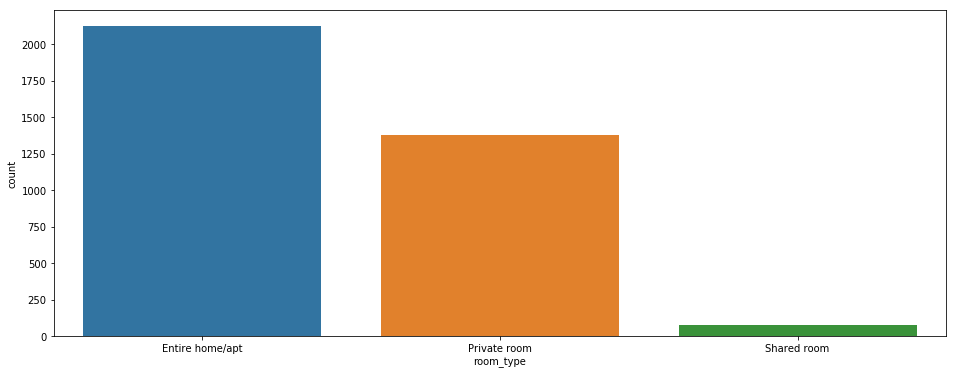

In [14]:
fig, ax = plt.subplots(figsize=(16,6))
sns.countplot(x="room_type",data=data)

In the dataset, we can see room type that are 'Entire home/apt' are the prominent ones

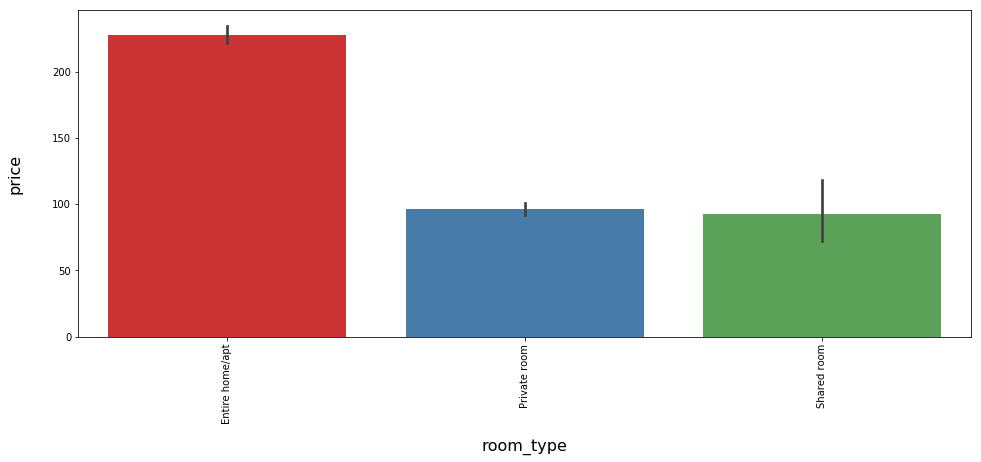

In [15]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(data['room_type'], data['price'], palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

Room type that are 'Entire home/apt'have the highest price.

In [16]:
data.groupby('bed_type')[['price']].mean()

,price
bed_type,
Airbed,78.675000
Couch,99.600000
Futon,85.254902
Pull-out Sofa,101.612903
Real Bed,177.203301


Grouping by the listings on the basis of bed_type and we can deduce that for Real Bed the mean price is highest

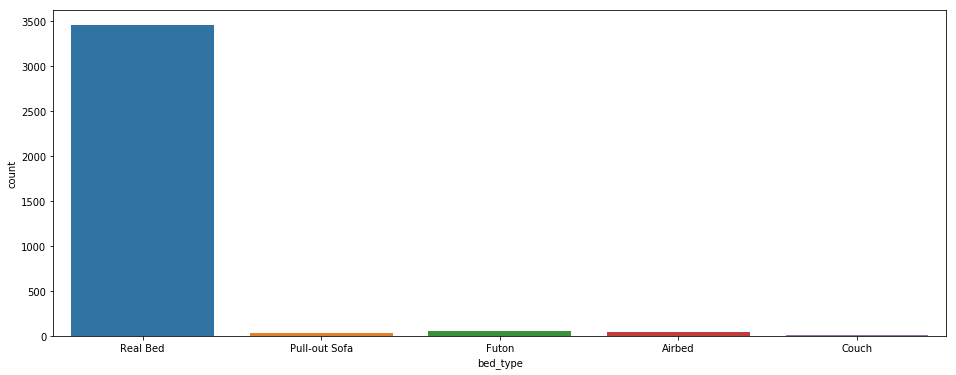

In [17]:
fig, ax = plt.subplots(figsize=(16,6))
sns.countplot(x="bed_type",data=data)

Bed-type that are 'Real Bed' are the most prominient ones.

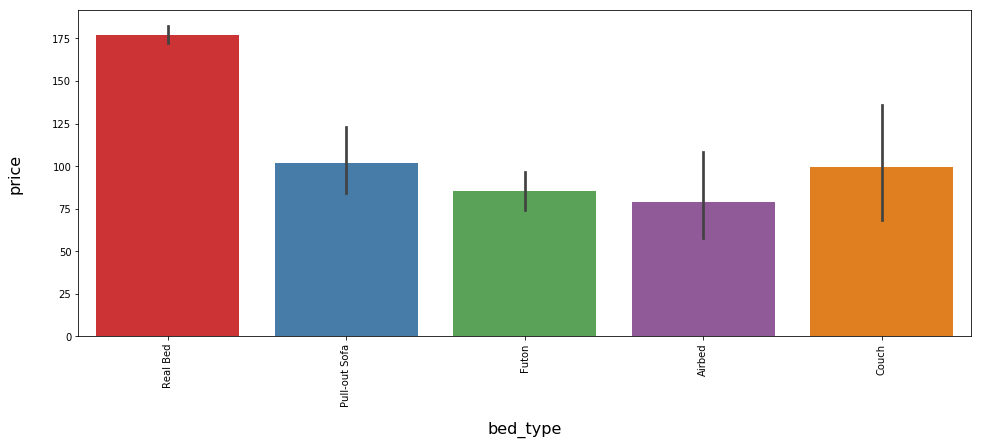

In [18]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(data['bed_type'], data['price'], palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

From the above barplot, we can see that the Bed_type that are 'Real Bed' have the highest price.

In [19]:
data.groupby('property_type')[['price']].mean()

,price
property_type,
Apartment,181.966692
Bed & Breakfast,129.365854
Boat,268.833333
Camper/RV,60.000000
Condominium,190.246753
Dorm,62.500000
Entire Floor,122.000000
Guesthouse,289.000000
House,131.599644


Grouping by the listings on the basis of property_type and we can deduce that for Guesthouse the mean price is highest

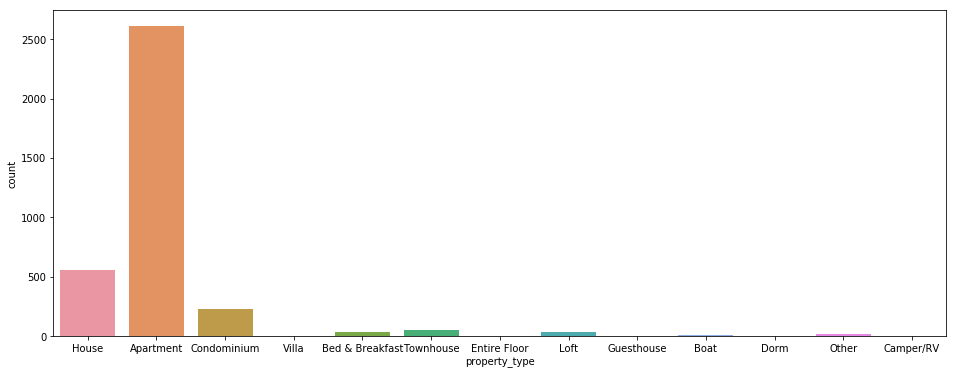

In [20]:
fig, ax = plt.subplots(figsize=(16,6))
sns.countplot(x="property_type",data=data)

Property type that are Apartment are the most prominient ones.

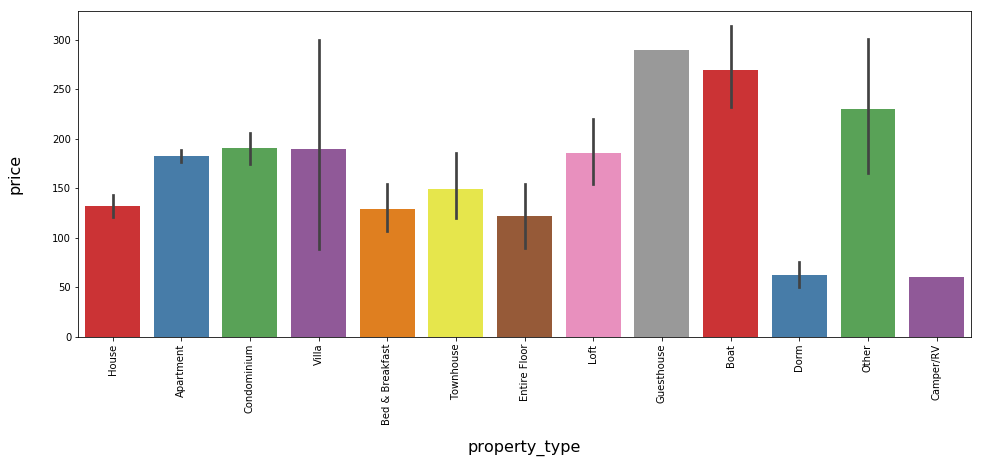

In [21]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(data['property_type'], data['price'], palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

From the above barplot, we can deduce that for GuestHouse property_type the price is the highest.

In [22]:
data.groupby('neighbourhood_cleansed')[['price']].mean()

,price
neighbourhood_cleansed,
Allston,112.307692
Back Bay,240.950331
Bay Village,266.833333
Beacon Hill,224.443299
Brighton,118.767568
Charlestown,198.045045
Chinatown,232.352113
Dorchester,91.639405
Downtown,236.459302


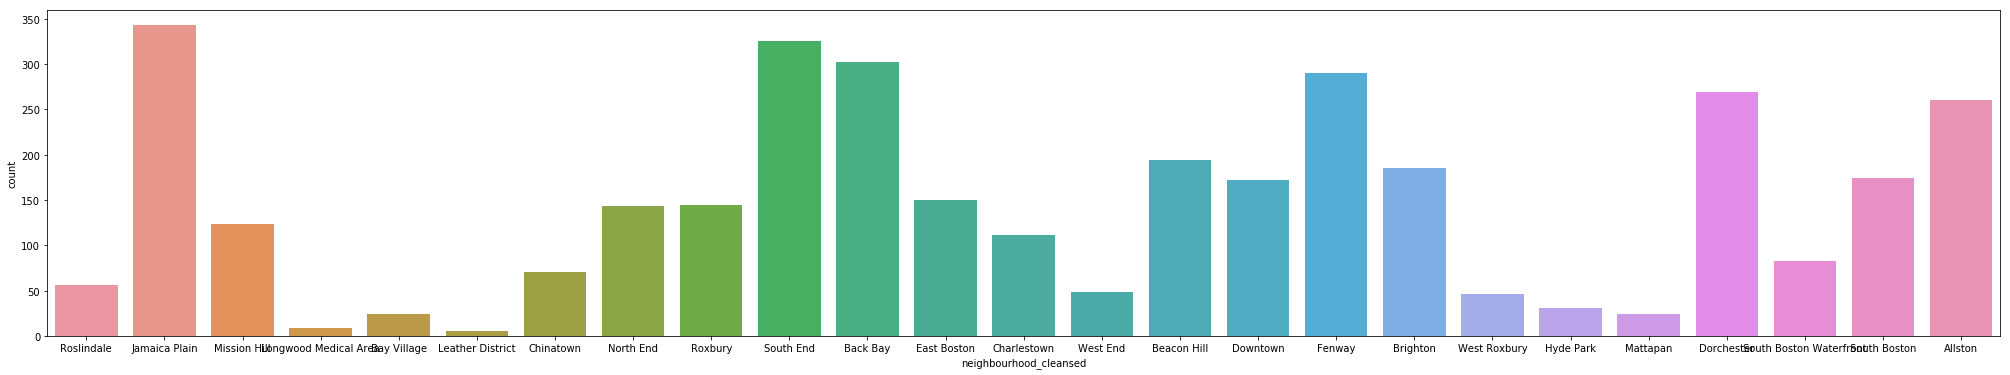

In [23]:
fig, ax = plt.subplots(figsize=(35,6))
sns.countplot(x="neighbourhood_cleansed",data=data)

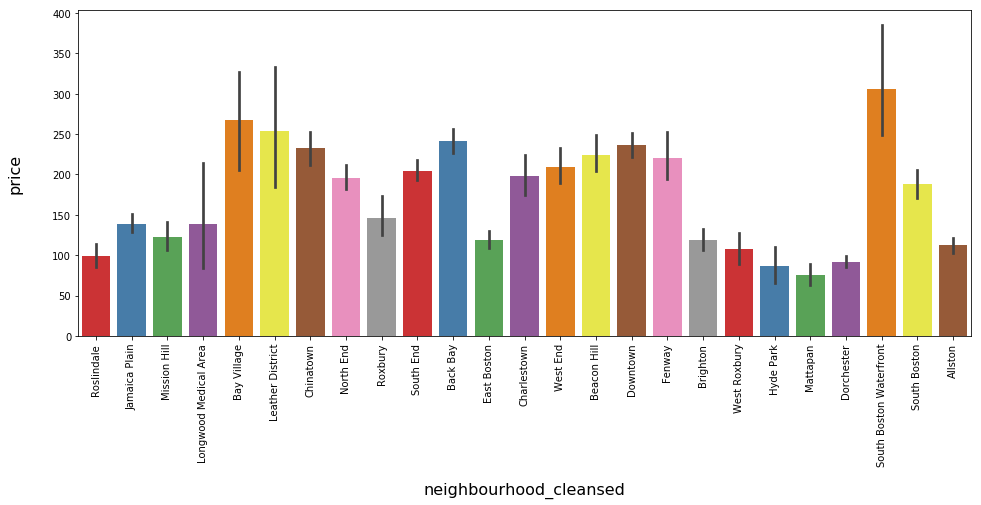

In [24]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(data['neighbourhood_cleansed'], data['price'], palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

In [25]:
data.groupby('zipcode')[['price']].mean()

,price
zipcode,
02108 02111,334.000000
02134-1704,80.000000
2108,230.361111
2109,238.941176
2110,274.076923
2111,253.535354
2113,190.158416
2114,213.238095
2115,195.065089


Grouping by the listings on the basis of zipcode and we can deduce that listings present in locality 2210 have the highest mean price

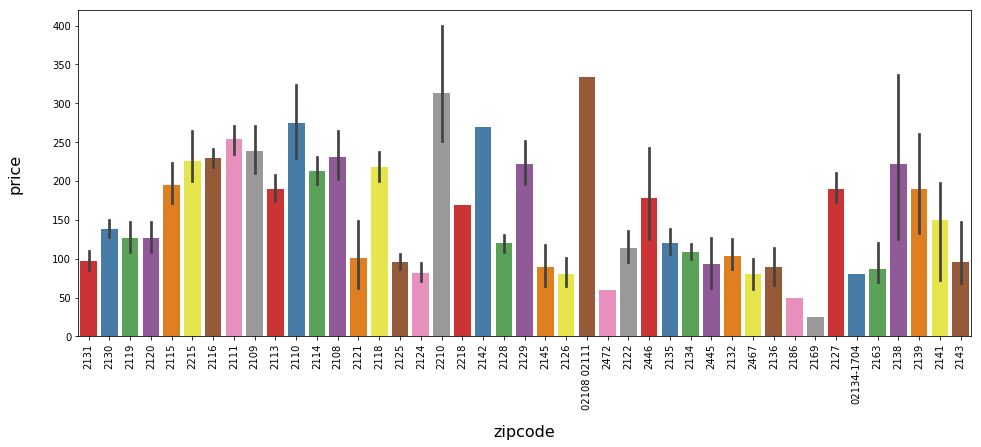

In [26]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(data['zipcode'], data['price'], palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

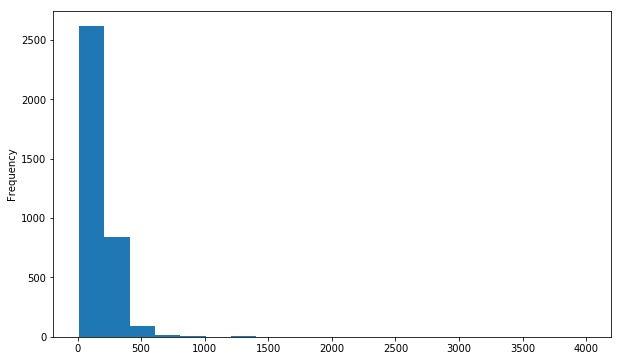

In [27]:
data['price'].plot.hist(bins=20, figsize=(10,6))

Plotted the histogram to study the range & frequency of price.

Maximum properties are priced below $500.

In [28]:
data.corr()

,id,host_id,accommodates,bathrooms,bedrooms,beds,square_feet,price,review_scores_rating
id,1.000000,0.565820,-0.050574,-0.014424,-0.058084,-0.044142,-0.265430,-0.059198,0.031877
host_id,0.565820,1.000000,-0.103485,-0.068266,-0.074806,-0.068918,-0.204931,-0.040043,0.007022
accommodates,-0.050574,-0.103485,1.000000,0.346914,0.724826,0.815366,0.486852,0.437756,0.036653
bathrooms,-0.014424,-0.068266,0.346914,1.000000,0.430854,0.347717,0.466834,0.248234,0.002122
bedrooms,-0.058084,-0.074806,0.724826,0.430854,1.000000,0.710654,0.491993,0.385298,0.055272
beds,-0.044142,-0.068918,0.815366,0.347717,0.710654,1.000000,0.312219,0.370013,0.033852
square_feet,-0.265430,-0.204931,0.486852,0.466834,0.491993,0.312219,1.000000,0.447795,-0.175922
price,-0.059198,-0.040043,0.437756,0.248234,0.385298,0.370013,0.447795,1.000000,0.105651
review_scores_rating,0.031877,0.007022,0.036653,0.002122,0.055272,0.033852,-0.175922,0.105651,1.000000


### Detecting Outliers

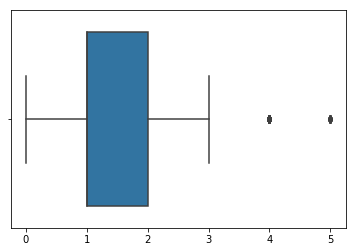

In [29]:
sns.boxplot(np.array(data['bedrooms']))

We can deduce that bedrooms column has 2 outliers. So its missing values will be replaced with the mean value.

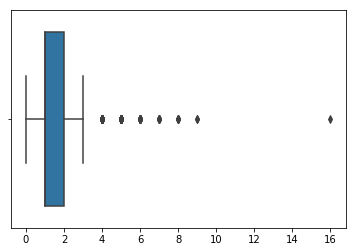

In [30]:
sns.boxplot(np.array(data['beds']))

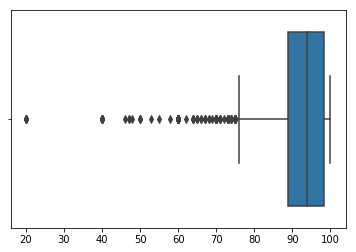

In [31]:
sns.boxplot(np.array(data['review_scores_rating']))

We can deduce that review_score_rating column has lot of outliers. So its missing values will be replaced with the median value.

## Data Wrangling

In [32]:
data.isnull().values.any()

True

Checking if our dataset contains any missing value.

In [33]:
data.isnull().sum().sum()

7345

Checking how many missing values are present in the dataset 

In [34]:
data.isnull().sum()

id                           0
scrape_id                    0
last_scraped                 0
neighborhood_overview     1415
host_id                      0
host_name                    0
host_since                   0
street                       0
neighbourhood_cleansed       0
city                         2
state                        0
zipcode                     38
country                      0
latitude                     0
longitude                    0
property_type                3
room_type                    0
accommodates                 0
bathrooms                   14
bedrooms                    10
beds                         9
bed_type                     0
square_feet               3529
price                        0
first_review               756
last_review                756
review_scores_rating       813
dtype: int64

In [35]:
total = data.isnull().sum()[data.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(data)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])

,total_missing,percent
square_feet,3529,98.44
neighborhood_overview,1415,39.47
review_scores_rating,813,22.68
last_review,756,21.09
first_review,756,21.09
zipcode,38,1.06
bathrooms,14,0.39
bedrooms,10,0.28
beds,9,0.25
property_type,3,0.08


The above table shows the no of missing values along with the percentage.
We are dropping the columns with missing values percentage greater than 60%. So square_feet should be dropped from our analysis.

In [36]:
review_array = data[data["review_scores_rating"]!=np.nan]["review_scores_rating"]
data["review_scores_rating"] = data["review_scores_rating"].replace(np.nan,review_array.median())

Replacing the NaN values in review_score_ratings column by the median value as the column have many outliers.

In [37]:
bedrooms_array = data[data["bedrooms"]!=np.nan]["bedrooms"]
data['bedrooms']=data["bedrooms"].replace(np.nan,bedrooms_array.mean())

Replacing the NaN values in bedrooms column by the mean value as the column has only 2 outliers.

In [38]:
beds_array = data[data["beds"]!=np.nan]["beds"]
data['beds']=data["beds"].replace(np.nan,beds_array.mean())

Replacing the NaN values in beds column by the mean value as the column has few outliers.

In [39]:
bathrooms_array = data[data["bathrooms"]!=np.nan]["bathrooms"]
data['bathrooms']=data["bathrooms"].replace(np.nan,bathrooms_array.mean())

Replacing the NaN values in bedrooms column by the mean value as the column has few outliers.

In [40]:
data = data.drop(['square_feet'], axis=1)

Dropping the square feet column as it contains 98.44% null values.

In [41]:
data.isnull().sum()

id                           0
scrape_id                    0
last_scraped                 0
neighborhood_overview     1415
host_id                      0
host_name                    0
host_since                   0
street                       0
neighbourhood_cleansed       0
city                         2
state                        0
zipcode                     38
country                      0
latitude                     0
longitude                    0
property_type                3
room_type                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
beds                         0
bed_type                     0
price                        0
first_review               756
last_review                756
review_scores_rating         0
dtype: int64

NaN values have been taken care of.

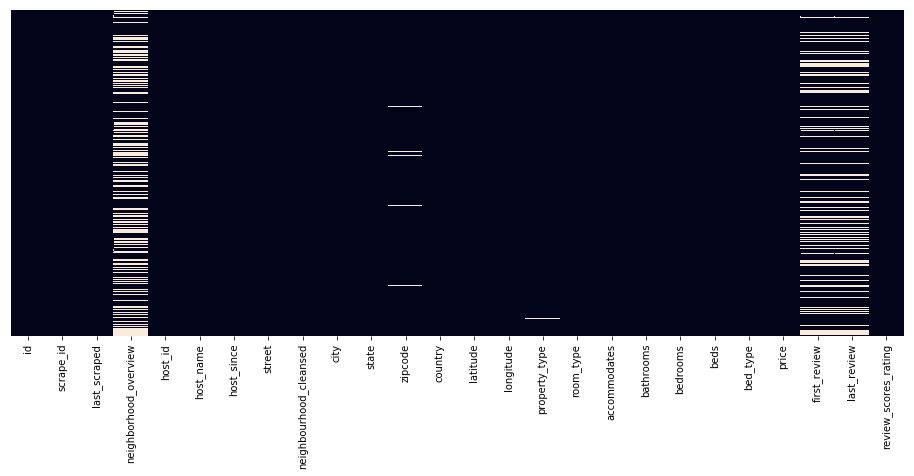

In [42]:
fig, ax = plt.subplots(figsize=(16,6))
sns.heatmap(data.isnull(),yticklabels=False, cbar=False)

Plotted the heatmap to viually see if there are any null/NaN values in the dataset.
We can see that the 'neighbourhood_overview', 'first_review' & 'last_review' have null/NaN values.
Since we will not be using these variables in our predictive models so we are not replacing these values.

In [43]:
data.corr()

,id,host_id,accommodates,bathrooms,bedrooms,beds,price,review_scores_rating
id,1.000000,0.565820,-0.050574,-0.014357,-0.057838,-0.044082,-0.059198,0.061744
host_id,0.565820,1.000000,-0.103485,-0.068100,-0.074687,-0.068729,-0.040043,0.022955
accommodates,-0.050574,-0.103485,1.000000,0.346516,0.724479,0.814681,0.437756,0.030701
bathrooms,-0.014357,-0.068100,0.346516,1.000000,0.430588,0.347531,0.248003,0.004382
bedrooms,-0.057838,-0.074687,0.724479,0.430588,1.000000,0.710190,0.385227,0.050464
beds,-0.044082,-0.068729,0.814681,0.347531,0.710190,1.000000,0.369777,0.027784
price,-0.059198,-0.040043,0.437756,0.248003,0.385227,0.369777,1.000000,0.079709
review_scores_rating,0.061744,0.022955,0.030701,0.004382,0.050464,0.027784,0.079709,1.000000


### Creating Binary Categorical Column

In [44]:
data['bed_number'] = data['beds']>2

As part of requirement, created the binary categorical data column for number of beds.<br> The value is True for no. of beds greater than 2 and False for number of beds less than or equal to 2.

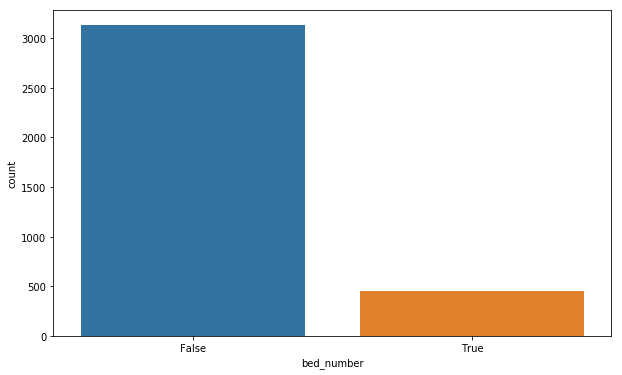

In [45]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x="bed_number",data=data)

The count distribution of independent binary categorical variable "bed_number" to see how many values are true/false.

### Encoding Categorical variables

In [46]:
df = pd.get_dummies(data, columns=['room_type', 'bed_type', 'property_type','bed_number'], drop_first=True)

Created dummy variables for multivariate categorical predictors.<br>
For k classes, (k-1) columns are being created having data as 0/1.

In [47]:
df.corr()

,id,host_id,accommodates,bathrooms,bedrooms,beds,price,review_scores_rating,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,property_type_Bed & Breakfast,property_type_Boat,property_type_Camper/RV,property_type_Condominium,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa,bed_number_True
id,1.000000,0.565820,-0.050574,-0.014357,-0.057838,-0.044082,-0.059198,0.061744,0.038415,0.065949,0.026430,-0.011904,0.010413,-0.026339,-0.030295,-0.071529,0.021881,0.072596,0.017988,0.023057,0.023454,-0.098583,0.002935,0.040518,0.066507,-0.008922,-0.062083
host_id,0.565820,1.000000,-0.103485,-0.068100,-0.074687,-0.068729,-0.040043,0.022955,0.080791,0.072902,0.033228,0.015641,-0.005867,-0.009220,-0.023801,-0.042611,0.045397,0.042786,0.011870,0.020898,0.034945,-0.004592,-0.021559,-0.017146,0.100553,0.007023,-0.075480
accommodates,-0.050574,-0.103485,1.000000,0.346516,0.724479,0.814681,0.437756,0.030701,-0.497405,-0.129852,-0.051777,-0.069003,-0.054676,0.140277,-0.051168,0.090970,0.037177,0.021374,-0.007190,0.018014,0.009003,-0.018203,-0.009993,-0.031278,-0.035058,0.002886,0.654168
bathrooms,-0.014357,-0.068100,0.346516,1.000000,0.430588,0.347531,0.248003,0.004382,-0.050342,-0.052869,-0.012856,-0.022612,-0.026315,0.055518,-0.005998,0.012934,-0.040777,0.000680,-0.010464,0.001894,-0.007398,0.193233,-0.008835,0.237177,0.034464,0.002320,0.306499
bedrooms,-0.057838,-0.074687,0.724479,0.430588,1.000000,0.710190,0.385227,0.050464,-0.268972,-0.051426,-0.018003,-0.053422,-0.051825,0.084283,-0.033123,0.044502,-0.027901,0.033055,-0.008042,0.010848,0.016529,0.075669,-0.021393,-0.023496,-0.017729,-0.013937,0.623341
beds,-0.044082,-0.068729,0.814681,0.347531,0.710190,1.000000,0.369777,0.027784,-0.349282,-0.061168,-0.021413,-0.053767,-0.047356,0.092942,-0.037293,0.127584,0.022996,0.019461,-0.014243,0.021202,0.006463,0.068749,-0.015313,-0.029555,-0.013349,-0.011174,0.790724
price,-0.059198,-0.040043,0.437756,0.248003,0.385227,0.369777,1.000000,0.079709,-0.414956,-0.082678,-0.026505,-0.071823,-0.045537,0.113027,-0.032316,0.037085,-0.012831,0.028880,-0.017750,-0.011701,0.012960,-0.123051,0.008121,0.026070,-0.020753,0.004300,0.292752
review_scores_rating,0.061744,0.022955,0.030701,0.004382,0.050464,0.027784,0.079709,1.000000,-0.044185,-0.008771,-0.014997,-0.009462,-0.003956,0.010436,0.000014,-0.004969,0.003194,0.060964,-0.016514,0.012340,0.015089,0.004126,0.043669,-0.012345,0.033158,0.016738,0.024424
room_type_Private room,0.038415,0.080791,-0.497405,-0.050342,-0.268972,-0.349282,-0.414956,-0.044185,1.000000,-0.119378,-0.009174,0.064870,-0.011865,-0.076921,0.119941,-0.025937,-0.013199,-0.022868,0.029900,0.007944,-0.013199,0.298050,-0.038645,0.037274,0.090595,0.023760,-0.250889
room_type_Shared room,0.065949,0.072902,-0.129852,-0.052869,-0.051426,-0.061168,-0.082678,-0.008771,-0.119378,1.000000,0.242655,0.045639,0.251048,-0.311414,0.001511,-0.008755,-0.002524,-0.024265,-0.003569,-0.005049,-0.002524,-0.018393,0.020567,0.099529,-0.018683,-0.006186,-0.046172


In [48]:
features = df[['price','bed_number_True','accommodates','bathrooms','bedrooms','beds','review_scores_rating','room_type_Private room','room_type_Shared room','bed_type_Couch','bed_type_Futon','bed_type_Pull-out Sofa','bed_type_Real Bed','property_type_Bed & Breakfast','property_type_Boat','property_type_Camper/RV','property_type_Condominium','property_type_Dorm','property_type_Entire Floor','property_type_Guesthouse','property_type_House','property_type_Loft','property_type_Other','property_type_Townhouse','property_type_Villa']]

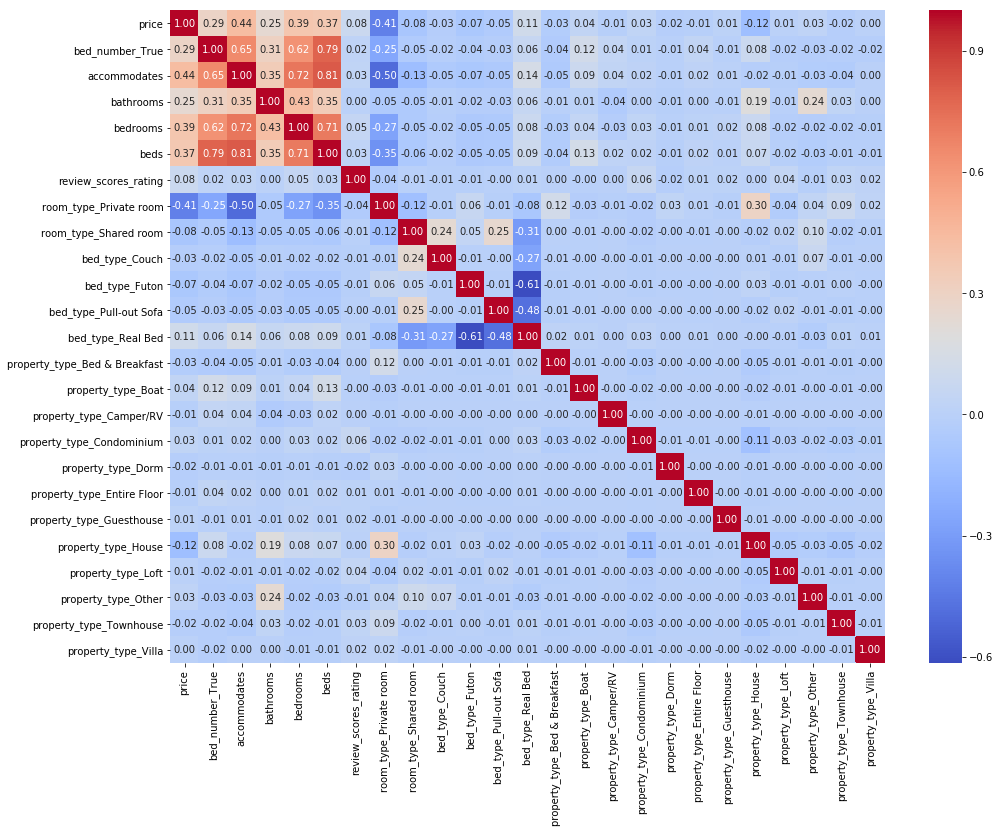

In [49]:
plt.figure(figsize=(16,12))
sns.heatmap(data=features.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

'review_scores_rating' is loosely coorelated with the target variable 'price'.<br>
'Beds', 'Accommodates', 'Bathrooms', 'Bedrooms' have correlation with target variable 'price'.

## Linear Regression & Interaction Effect

In [50]:
def plot_regression(dataframe, dependent_variable):
    """
     fits linear regression model on given data
     param dataframe: independent predictors dataset
     param dependent_variable: target vaiable that we want to predict
     return: linear regression plot of order 1 & order 2.
    """
    x_var = dataframe.drop([dependent_variable],axis=1)
    xvar_name = x_var.columns
    for i in range(0,xvar_name.shape[0]):
        X = x_var[xvar_name[i]]
        plt.scatter(X,dataframe[dependent_variable],label ='data', color ='red')
        sns.regplot(x=xvar_name[i], y = dependent_variable, data = dataframe,label = 'order1', color='blue', scatter = None)
        sns.regplot(x=xvar_name[i], y = dependent_variable, data = dataframe,label = 'order2', color='green', order =2, scatter = None)
        plt.legend(loc='upper right')
        plt.show()

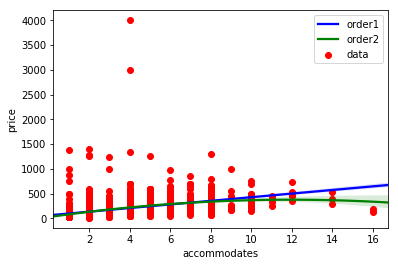

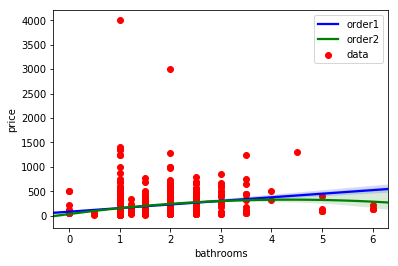

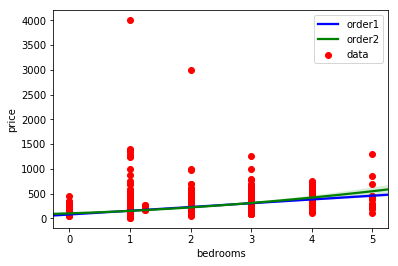

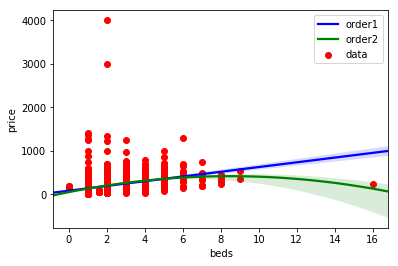

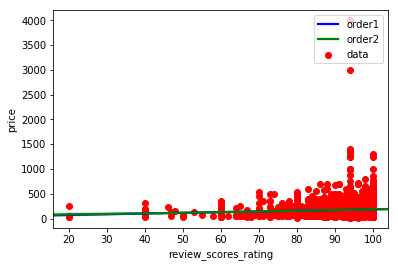

In [51]:
plot_regression(dataframe = features[['price','accommodates','bathrooms','bedrooms','beds','review_scores_rating']], dependent_variable="price")

Regression Plots of order1 & order2 to deduce that accomodates and beds have good linear relationship with target variable price.
For 'review_score_rating' the target 'price' remains constant.

In [52]:
def model_regression(data):
    """
     fits linear regression model on given data
     param data: independent predictors dataset
     return: linear regression model with fit of data
    """
    X = sm.add_constant(data)
    y = df[['price']]
    model = linear_model.LinearRegression()
    model = sm.OLS(y, X)
    results = model.fit()
    return results.summary()

In [53]:
#Function to cross validate the linear regression model
def cross_validation(feature_cols):
    """
     coss validate the linear regression model on given data
     param feature_cols: independent predictors
     return: RMSE & R2 of the model.
    """
    from sklearn.metrics import mean_squared_error
    X = feature_cols
    y = df.price
    lm = LinearRegression()    
    r2= cross_val_score(lm, X, y, cv=10, scoring = make_scorer(r2_score))
    ms_errors= cross_val_score(lm, X, y, cv=10, scoring = make_scorer(mean_squared_error))
    rms_errors = np.sqrt(ms_errors)
    mean_rms_error = rms_errors.mean()
    print("R2",r2.mean())
    print("Mean RMSE",mean_rms_error)

## 1st Model

In [54]:
X = df[['bed_number_True','accommodates','bedrooms','bathrooms','bed_type_Couch','bed_type_Futon','bed_type_Pull-out Sofa','bed_type_Real Bed']]
model_regression(data=X)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     119.6
Date:                Mon, 25 Feb 2019   Prob (F-statistic):          8.05e-178
Time:                        22:17:27   Log-Likelihood:                -22585.
No. Observations:                3585   AIC:                         4.519e+04
Df Residuals:                    3576   BIC:                         4.524e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -9.1289     21.484     -0.425      0.671     -51.251      32.993
bed_number_True          -13.4216      9.154     -1.466      0.143     -31.370       4.527
accommodates              27.6836      1.958     14.137      0.000      23.844      31.523
bedrooms                  23.9681      4.599      5.211      0.000      14.950      32.986
bathrooms                 25.7842      4.890      5.273      0.000      16.197      35.372
bed_type_Couch            20.4096     46.637      0.438      0.662     -71.028     111.847
bed_type_Futon           -12.4216     27.905     -0.445      0.656     -67.133      42.290
bed_type_Pull-out Sofa     7.8418     31.612      0.248      0.804     -54.138      69.821
bed_type_Real Bed         40.5024     21.132      1.917      0.055      -0.930      81.934
==============================================================================
Omnibus:                     6091.196   Durbin-Watson:                   1.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10170616.129
Skew:                          11.232   Prob(JB):                         0.00
Kurtosis:                     262.968   Cond. No.                         103.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#Cross Validating the model
cross_validation(feature_cols=X)

R2 0.10858909123833187
Mean RMSE 124.14878847298553


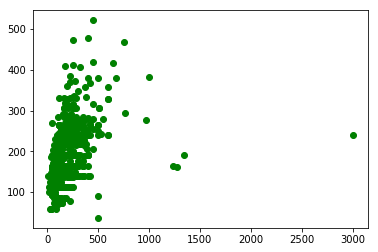

In [56]:
y = df[['price']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
model1 = linear_model.LinearRegression()
results = model1.fit(X_train, y_train)
predictions = model1.predict(X_test)
plt.scatter(y_test, predictions,color="green")

###### Is the relationship significant
Relation of accomodates, bedrroms and bathrooms with target price is very significant as their p values < 0.05.<br>
No Homoscedasticity<br>
No Collinearity<br>
We can see the linear relation between the actual and predicted values

###### Does the model make sense
Except for 'bed_number_true' and 'bed type futon', the model has a positive slope for all other predictors that signifies that increase in values those predictors has positive impact on the predictions of price i.e. price will also increase.

###### Cross validating the model
Mean Absolute Error 116.20

###### Comparing AIC,BIC, adjusted R2
AIC is almost equal to BIC. Adjusted R^2 is 0.21 that means model explains the 21% variablity in price.

### Adding the Interaction effect

In [57]:
interactionDF1= pd.DataFrame()
interactionDF1['bed_number_True']=df['bed_number_True']
interactionDF1['accommodates']=df['accommodates']
interactionDF1['bathrooms']=df['bathrooms']
interactionDF1['bedrooms']=df['bedrooms']
interactionDF1['bed_type_Couch']=df['bed_type_Couch']
interactionDF1['bed_type_Futon']=df['bed_type_Futon']
interactionDF1['bed_type_Pull-out Sofa']=df['bed_type_Pull-out Sofa']
interactionDF1['bed_type_Real Bed']=df['bed_type_Real Bed']
interactionDF1['bed*bathroom*bedrooms']=df['bedrooms']*df['beds']*df['accommodates']
model_regression(interactionDF1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     107.3
Date:                Mon, 25 Feb 2019   Prob (F-statistic):          2.09e-178
Time:                        22:17:27   Log-Likelihood:                -22581.
No. Observations:                3585   AIC:                         4.518e+04
Df Residuals:                    3575   BIC:                         4.524e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -17.0930     21.657     -0.789      0.430     -59.555      25.369
bed_number_True           -9.2694      9.269     -1.000      0.317     -27.442       8.904
accommodates              30.1063      2.145     14.038      0.000      25.901      34.311
bathrooms                 26.3160      4.889      5.382      0.000      16.730      35.902
bedrooms                  28.4594      4.875      5.838      0.000      18.901      38.018
bed_type_Couch            20.6941     46.594      0.444      0.657     -70.659     112.047
bed_type_Futon           -13.4565     27.882     -0.483      0.629     -68.122      41.209
bed_type_Pull-out Sofa     7.2681     31.584      0.230      0.818     -54.656      69.192
bed_type_Real Bed         38.1442     21.130      1.805      0.071      -3.284      79.572
bed*bathroom*bedrooms     -0.3035      0.110     -2.758      0.006      -0.519      -0.088
==============================================================================
Omnibus:                     6098.278   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10203921.742
Skew:                          11.260   Prob(JB):                         0.00
Kurtosis:                     263.391   Cond. No.                         895.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
#cross validating the model after adding the interaction terms
cross_validation(interactionDF1)

R2 0.11111321302920205
Mean RMSE 124.04767331104662


**Synergy Effect:**
<table>
    <tr>
        <th>Interaction </th>
        <th>Adjusted R-squared</th>
        <th>AIC</th>
        <th>BIC</th>
        <th>RMSE</th>
    </tr>
    <tr><td><b>Before Synergy</b> <td>Adj. R-squared:	0.209 <td> AIC:	4.519e+04 <td> BIC:	4.524e+04 <td> RMSE: 124.14878847298553</td></tr>
        <tr><td><b>After Synergy</b> <td>Adj. R-squared:	0.211 <td> AIC:	4.518e+04 <td> BIC:	4.524e+04 <td>RMSE: 124.04767331104662 </td></tr>
</table>

Clearly we can see that there is no significant improvement in the prediction model even after adding the interaction effect

### 2nd Model

In [59]:
X = df[['bed_number_True','accommodates','bathrooms','bedrooms','room_type_Private room','room_type_Shared room']]
model_regression(data=X)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     233.1
Date:                Mon, 25 Feb 2019   Prob (F-statistic):          5.12e-252
Time:                        22:17:28   Log-Likelihood:                -22418.
No. Observations:                3585   AIC:                         4.485e+04
Df Residuals:                    3578   BIC:                         4.489e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    103.4411      7.601     13.608      0.000      88.538     118.344
bed_number_True           -0.4946      8.763     -0.056      0.955     -17.676      16.687
accommodates               8.4067      2.135      3.938      0.000       4.221      12.592
bathrooms                 35.3171      4.694      7.524      0.000      26.114      44.520
bedrooms                  33.4209      4.415      7.569      0.000      24.764      42.078
room_type_Private room   -98.9838      5.224    -18.948      0.000    -109.226     -88.742
room_type_Shared room    -93.7623     14.788     -6.341      0.000    -122.755     -64.769
==============================================================================
Omnibus:                     6460.351   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14195015.269
Skew:                          12.693   Prob(JB):                         0.00
Kurtosis:                     310.221   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
#Cross Validating the model
cross_validation(X)

R2 0.24729020524117593
Mean RMSE 116.20658285382709


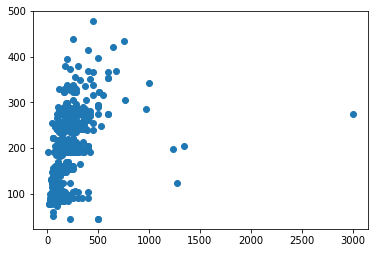

In [61]:
y = df[['price']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
model1 = linear_model.LinearRegression()
results = model1.fit(X_train, y_train)
predictions = model1.predict(X_test)
plt.scatter(y_test, predictions)

###### Is the relationship significant
Relation of accomodates, bedrooms, bathrooms, room_type_Private & room_type_Shared with target variable 'price' is very significant as their p value is less than 0.05.<br>
No Homoscedasticity<br>
No Collinearity<br>
We can see the linear relation between the actual and predicted values.

###### Does the model make sense
Except for 'bed_number_true', 'room_type_Private' & 'room_type_Shared', the model has a positive slope for all other predictors that signifies that increase in values those predictors has positive impact on the predictions of price i.e. price will also increase.

###### Cross validating the model
Mean Absolute Error 116.20

###### Comparing AIC,BIC, adjusted R2
AIC is almost equal to BIC. Adjusted R^2 is 0.28 that means model explains the 28% variablity in price.

### Adding the interaction effect

In [62]:
interactionDF1= pd.DataFrame()
interactionDF1['bed_number_True']=df['bed_number_True']
interactionDF1['bedrooms']=df['bedrooms']
interactionDF1['accommodates']=df['accommodates']
interactionDF1['bathrooms']=df['bathrooms']
interactionDF1['room_type_Private room']=df['room_type_Private room']
interactionDF1['room_type_Shared room']=df['room_type_Shared room']
interactionDF1['bed*bathroom*bedrooms']=df['bedrooms']*df['beds']*df['bathrooms']
model_regression(interactionDF1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     206.3
Date:                Mon, 25 Feb 2019   Prob (F-statistic):          7.35e-258
Time:                        22:17:28   Log-Likelihood:                -22402.
No. Observations:                3585   AIC:                         4.482e+04
Df Residuals:                    3577   BIC:                         4.487e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    131.5575      9.025     14.578      0.000     113.864     149.251
bed_number_True          -11.1847      8.923     -1.253      0.210     -28.679       6.310
bedrooms                  21.4039      4.872      4.393      0.000      11.851      30.957
accommodates               6.0204      2.166      2.780      0.005       1.774      10.267
bathrooms                 23.7768      5.090      4.671      0.000      13.797      33.757
room_type_Private room  -100.2233      5.205    -19.253      0.000    -110.429     -90.017
room_type_Shared room    -97.3401     14.736     -6.606      0.000    -126.231     -68.449
bed*bathroom*bedrooms      2.6343      0.461      5.719      0.000       1.731       3.537
==============================================================================
Omnibus:                     6492.615   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14743012.403
Skew:                          12.823   Prob(JB):                         0.00
Kurtosis:                     316.114   Cond. No.                         68.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
#Cross Validating the model
cross_validation(interactionDF1)

R2 0.25528262620436815
Mean RMSE 115.65858344555731


**Synergy Effect:**
<table>
    <tr>
        <th>Interaction </th>
        <th>Adjusted R-squared</th>
        <th>AIC</th>
        <th>BIC</th>
        <th>RMSE</th>
    </tr>
    <tr><td><b>Before Synergy</b> <td>Adj. R-squared:	0.280 <td> AIC:	4.485e+04 <td> BIC:	4.489e+04 <td>RMSE: 116.20658285382709</td></tr>
        <tr><td><b>After Synergy</b> <td>Adj. R-squared:	0.286 <td> AIC:	4.482e+04 <td> BIC:	4.487e+04<td>RMSE: 115.65858344555731 </td></tr>
</table>

Clearly we can see the improvement in the prediction model after adding the interaction effect

In [64]:
interactionDF1.columns

Index(['bed_number_True', 'bedrooms', 'accommodates', 'bathrooms',
       'room_type_Private room', 'room_type_Shared room',
       'bed*bathroom*bedrooms'],
      dtype='object')

### 3rd Model

In [65]:
X = df[['bed_number_True','accommodates','bathrooms','bedrooms','room_type_Private room','room_type_Shared room','property_type_Bed & Breakfast','property_type_Boat','property_type_Camper/RV','property_type_Condominium','property_type_Dorm','property_type_Entire Floor','property_type_Guesthouse','property_type_House','property_type_Loft','property_type_Other','property_type_Townhouse','property_type_Villa']]
model_regression(data=X)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     79.69
Date:                Mon, 25 Feb 2019   Prob (F-statistic):          1.97e-245
Time:                        22:17:28   Log-Likelihood:                -22403.
No. Observations:                3585   AIC:                         4.484e+04
Df Residuals:                    3566   BIC:                         4.496e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           101.4346      7.757     13.076      0.000      86.226     116.643
bed_number_True                   3.2267      8.831      0.365      0.715     -14.087      20.540
accommodates                      8.5629      2.140      4.002      0.000       4.368      12.758
bathrooms                        36.2944      4.969      7.305      0.000      26.553      46.036
bedrooms                         34.1057      4.446      7.671      0.000      25.389      42.823
room_type_Private room          -92.3534      5.577    -16.558      0.000    -103.289     -81.418
room_type_Shared room           -93.5715     14.877     -6.290      0.000    -122.740     -64.403
property_type_Bed & Breakfast    18.7491     19.995      0.938      0.348     -20.454      57.953
property_type_Boat               19.2322     36.708      0.524      0.600     -52.740      91.204
property_type_Camper/RV        -104.6015    126.390     -0.828      0.408    -352.405     143.202
property_type_Condominium         3.0119      8.635      0.349      0.727     -13.918      19.942
property_type_Dorm              -38.3885     88.903     -0.432      0.666    -212.695     135.918
property_type_Entire Floor      -65.6494     62.916     -1.043      0.297    -189.005      57.707
property_type_Guesthouse         48.8080    125.667      0.388      0.698    -197.578     295.194
property_type_House             -27.6163      6.393     -4.320      0.000     -40.151     -15.082
property_type_Loft                2.4669     20.274      0.122      0.903     -37.284      42.218
property_type_Other              50.2869     32.162      1.564      0.118     -12.771     113.345
property_type_Townhouse           5.4899     17.425      0.315      0.753     -28.674      39.653
property_type_Villa              43.0448     51.396      0.838      0.402     -57.723     143.813
==============================================================================
Omnibus:                     6487.287   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14616416.015
Skew:                          12.802   Prob(JB):                         0.00
Kurtosis:                     314.761   Cond. No.                         246.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
#Cross Validating the model
cross_validation(X)

R2 0.23799002305819514
Mean RMSE 116.91258044231174


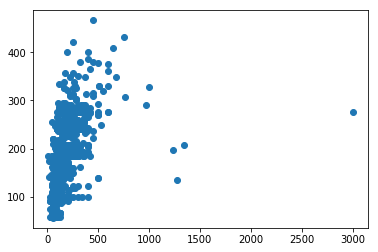

In [67]:
X = df[['bed_number_True','accommodates','bathrooms','bedrooms','beds','room_type_Private room','property_type_House']]
y = df[['price']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
model1 = linear_model.LinearRegression()
results = model1.fit(X_train, y_train)
predictions = model1.predict(X_test)
plt.scatter(y_test, predictions)

###### Is the relationship significant
Relation of accommodates, bathrooms, bedrooms, room_type_Private room, room_type_Shared room & property_type_House with target variable 'price' is very significant as their p value is less than 0.05.<br>
No Homoscedasticity<br>
No Collinearity<br>
We can see the linear relation between the actual and predicted values

###### Does the model make sense
Except for room_type_Private room, room_type_Shared room, property_type_Camper/RV, property_type_Dorm, property_type_Entire Floor, property_type_House, the model has a positive slope for all other predictors that signifies that increase in values those predictors has positive impact on the predictions of price i.e. price will also increase.

###### Cross validating the model
Mean Absolute Error 116.91

###### Comparing AIC,BIC, adjusted R2
AIC is almost equal to BIC. Adjusted R^2 is 0.283 that means model explains the 29% variablity in price.

### Adding the interaction effect:

In [68]:
interactionDF1= pd.DataFrame()
interactionDF1['bed_number_True']=df['bed_number_True']
interactionDF1['bedrooms']=df['bedrooms']
interactionDF1['accommodates']=df['accommodates']
interactionDF1['bathrooms']=df['bathrooms']
interactionDF1['room_type_Private room']=df['room_type_Private room']
interactionDF1['room_type_Shared room']=df['room_type_Shared room']
interactionDF1['property_type_Bed & Breakfast']=df['property_type_Bed & Breakfast']
interactionDF1['property_type_Boat']=df['property_type_Boat']
interactionDF1['property_type_Camper/RV']=df['property_type_Camper/RV']
interactionDF1['property_type_Condominium']=df['property_type_Condominium']
interactionDF1['property_type_Dorm']=df['property_type_Dorm']
interactionDF1['property_type_Entire Floor']=df['property_type_Entire Floor']
interactionDF1['property_type_Guesthouse']=df['property_type_Guesthouse']
interactionDF1['property_type_House']=df['property_type_House']
interactionDF1['property_type_Loft']=df['property_type_Loft']
interactionDF1['property_type_Other']=df['property_type_Other']
interactionDF1['property_type_Villa']=df['property_type_Villa']
interactionDF1['property_type_Townhouse']=df['property_type_Townhouse']
interactionDF1['bed*bathroom*bedrooms']=df['bedrooms']*df['beds']*df['bathrooms']
model_regression(interactionDF1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     78.49
Date:                Mon, 25 Feb 2019   Prob (F-statistic):          3.27e-253
Time:                        22:17:28   Log-Likelihood:                -22383.
No. Observations:                3585   AIC:                         4.481e+04
Df Residuals:                    3565   BIC:                         4.493e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           133.1460      9.169     14.521      0.000     115.169     151.123
bed_number_True                  -8.4631      8.970     -0.944      0.345     -26.049       9.123
bedrooms                         20.8130      4.885      4.260      0.000      11.235      30.391
accommodates                      5.8899      2.168      2.716      0.007       1.638      10.142
bathrooms                        22.9826      5.361      4.287      0.000      12.471      33.494
room_type_Private room          -92.8061      5.547    -16.731      0.000    -103.681     -81.931
room_type_Shared room           -98.1550     14.812     -6.627      0.000    -127.196     -69.114
property_type_Bed & Breakfast    18.3716     19.884      0.924      0.356     -20.614      57.358
property_type_Boat               23.6473     36.511      0.648      0.517     -47.937      95.232
property_type_Camper/RV        -105.9125    125.688     -0.843      0.399    -352.341     140.516
property_type_Condominium         4.4832      8.590      0.522      0.602     -12.359      21.325
property_type_Dorm              -39.3274     88.410     -0.445      0.656    -212.666     134.011
property_type_Entire Floor      -59.5961     62.574     -0.952      0.341    -182.281      63.089
property_type_Guesthouse         55.8173    124.974      0.447      0.655    -189.210     300.845
property_type_House             -31.0774      6.381     -4.871      0.000     -43.588     -18.567
property_type_Loft                1.7234     20.162      0.085      0.932     -37.807      41.254
property_type_Other              69.1166     32.119      2.152      0.031       6.144     132.090
property_type_Villa              45.3342     51.112      0.887      0.375     -54.877     145.545
property_type_Townhouse           1.5428     17.339      0.089      0.929     -32.452      35.538
bed*bathroom*bedrooms             2.9671      0.464      6.398      0.000       2.058       3.876
==============================================================================
Omnibus:                     6527.902   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         15320680.593
Skew:                          12.967   Prob(JB):                         0.00
Kurtosis:                     322.206   Cond. No.                         576.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
#Cross Validating the model
cross_validation(interactionDF1)

R2 0.2523307053869794
Mean RMSE 116.0001252239889


**Synergy Effect:**
<table>
    <tr>
        <th>Interaction </th>
        <th>Adjusted R-squared</th>
        <th>AIC</th>
        <th>BIC</th>
        <th>RMSE</th>
    </tr>
    <tr><td><b>Before Synergy</b> <td>Adj. R-squared:	0.283 <td> AIC:	4.484e+04 <td> BIC:	4.496e+04<td>RMSE: 116.91258044231174</td></tr>
        <tr><td><b>After Synergy</b> <td>Adj. R-squared:	0.291 <td> AIC:	4.481e+04 <td> BIC:	4.493e+04 <td>RMSE: 116.0001252239889</td></tr>
</table>

Clearly we can see the improvement in the prediction model after adding the interaction effect

In [70]:
interactionDF1.columns

Index(['bed_number_True', 'bedrooms', 'accommodates', 'bathrooms',
       'room_type_Private room', 'room_type_Shared room',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Camper/RV', 'property_type_Condominium',
       'property_type_Dorm', 'property_type_Entire Floor',
       'property_type_Guesthouse', 'property_type_House', 'property_type_Loft',
       'property_type_Other', 'property_type_Villa', 'property_type_Townhouse',
       'bed*bathroom*bedrooms'],
      dtype='object')

### Comparision of Models:

While comparing the model, we would be considering the Adjusted R2 along with aic/bic values for the model selection:<br>

**Model 1:** Lowest adjusted r2 value among all the 3 models. Highest value of aic <br>
Adj. R-squared:	0.209<br>
AIC:	4.519e+04<br>
BIC:	4.524e+04<br>
RMSE:   124.14878847298553

**Model 2:** Almost same adjusted r2 value & aic values as that of Model 3. <br>
Adj. R-squared: 0.280<br>
AIC:	4.485e+04<br>
BIC:	4.489e+04<br>
RMSE:   116.20658285382709

**Model 3:** Highest adjusted r2 value among all the 3 models. Lowest value of aic <br>
Adj. R-squared:	0.283 <br>
AIC:	4.484e+04 <br>
BIC:	4.496e+04 <br>
RMSE:   116.91258044231174


Certainly we can deduce that the Model 3 is the best model among all the 3 predicted linear models.

## Logistic Regression

In [71]:
features['binary_price'] = df['price']>df['price'].mean()

/Users/sarthakgoel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


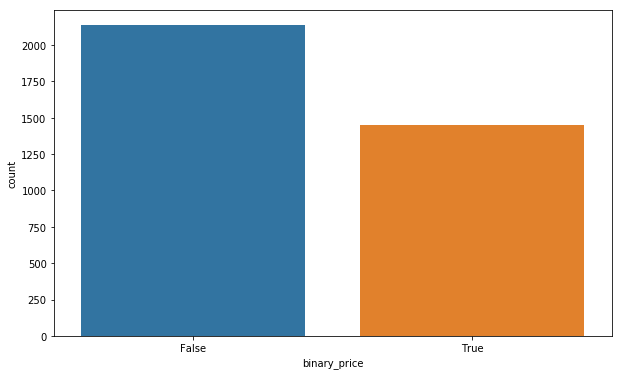

In [72]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x="binary_price",data=features)

In [73]:
features.columns

Index(['price', 'bed_number_True', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'review_scores_rating', 'room_type_Private room',
       'room_type_Shared room', 'bed_type_Couch', 'bed_type_Futon',
       'bed_type_Pull-out Sofa', 'bed_type_Real Bed',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Camper/RV', 'property_type_Condominium',
       'property_type_Dorm', 'property_type_Entire Floor',
       'property_type_Guesthouse', 'property_type_House', 'property_type_Loft',
       'property_type_Other', 'property_type_Townhouse', 'property_type_Villa',
       'binary_price'],
      dtype='object')

Created a new binary categorical column in dataframe for performing logistic regression.

If the price of listing is greater than the mean price than it new column will contain True else it will contain False.

In [74]:
def plot_logistic(dataframe, dependent_variable):
    """
     logistic regression relationship on given data
     param dataframe: independent predictors dataset
     param dependent_variable: target vaiable that we want to predict
     return: logistic regression plot.
    """
    x_var = dataframe.drop([dependent_variable],axis=1)
    xvar_name = x_var.columns
    for i in range(0,xvar_name.shape[0]):
        X = x_var[xvar_name[i]]
        sns.lmplot(x=xvar_name[i], y=dependent_variable, data=dataframe, ci=None)
        plt.show()

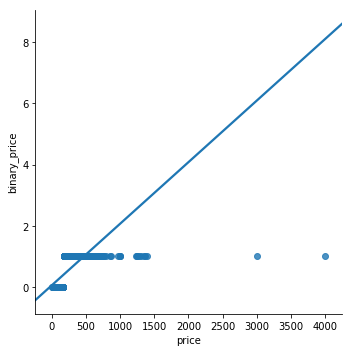

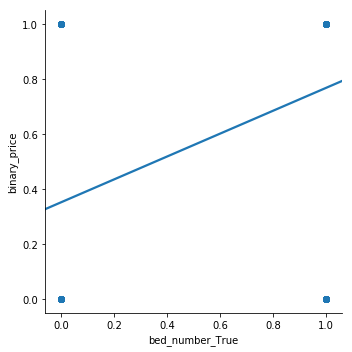

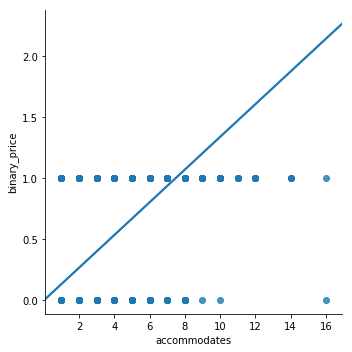

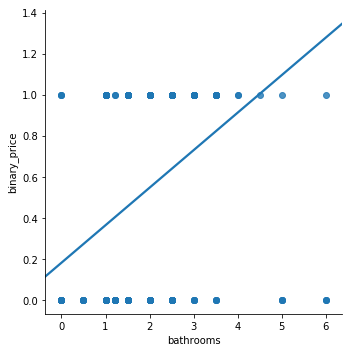

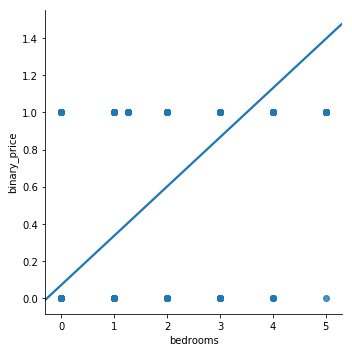

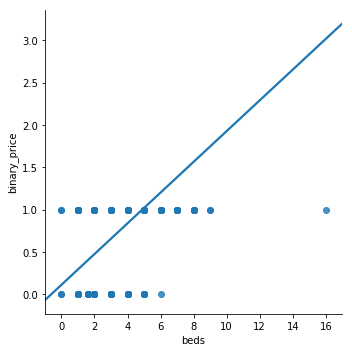

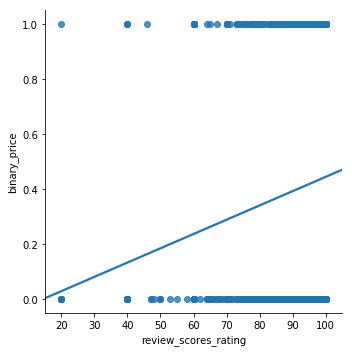

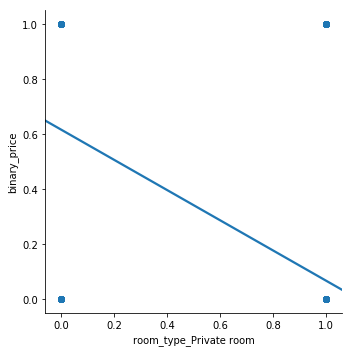

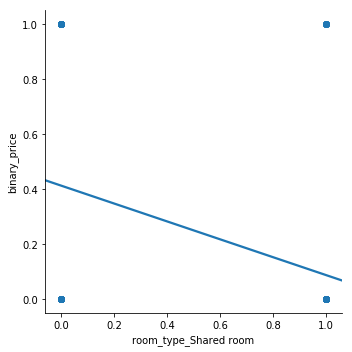

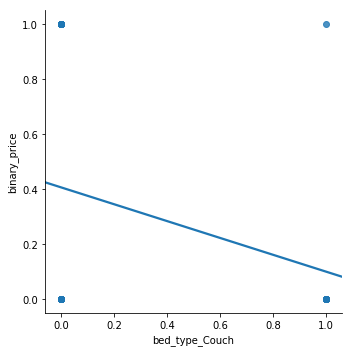

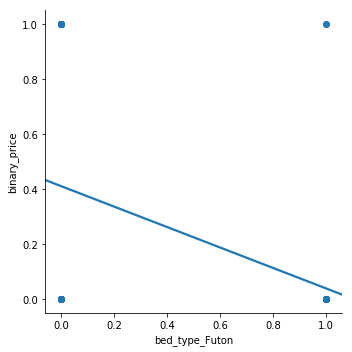

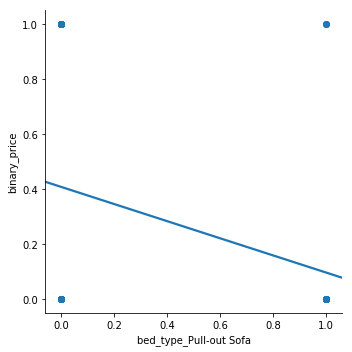

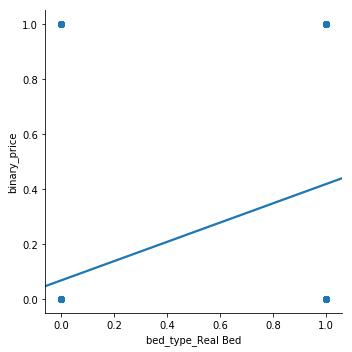

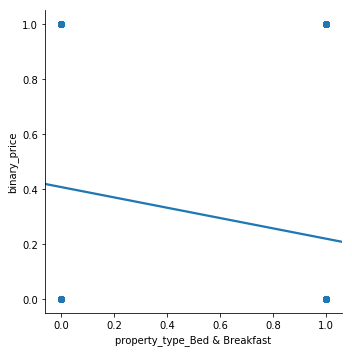

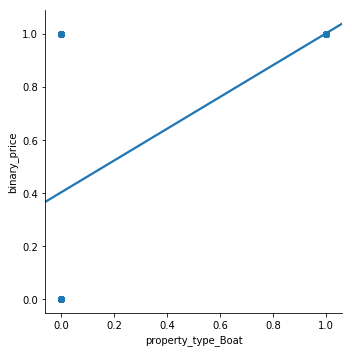

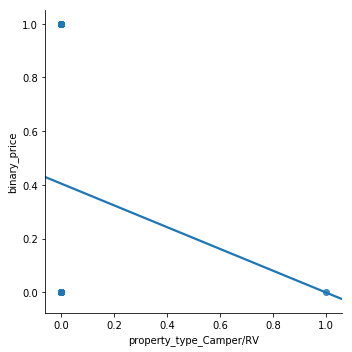

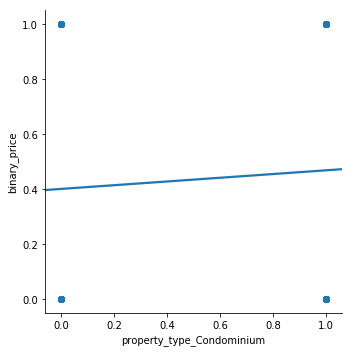

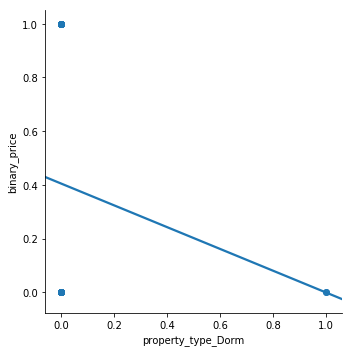

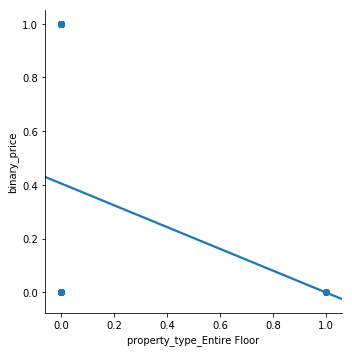

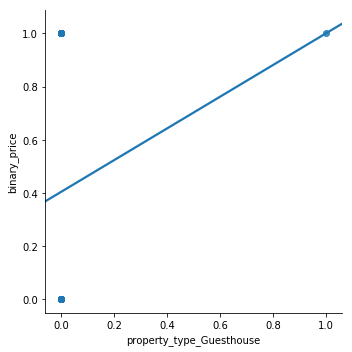

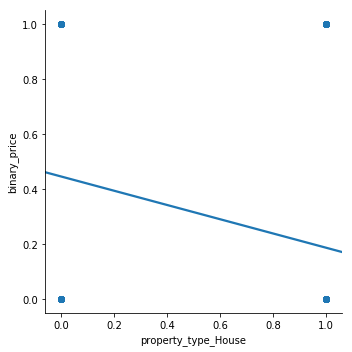

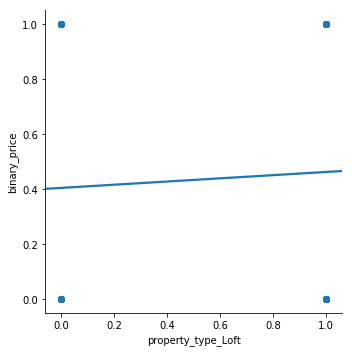

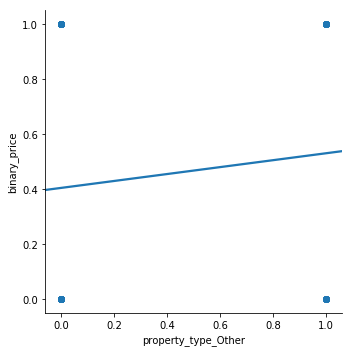

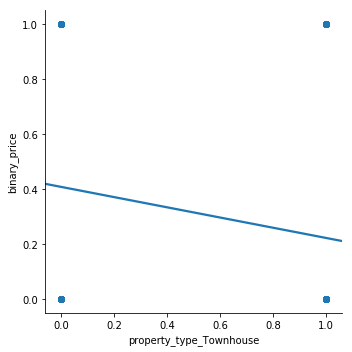

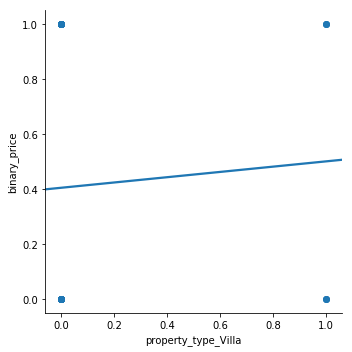

In [75]:
plot_logistic(dataframe=features, dependent_variable='binary_price')

The reason for using logistic regression for this problem is that the dependent variable binary_price represented by “True” and “False” are not cardinal numbers. If the problem was changed so that binary_price was replaced with the grade 0–100 (cardinal numbers), then simple regression analysis could be used.

In [76]:
#Function to create the logistic regression model on given data
def model_logistic(feature_cols):
    """
     create the logistic regression model on given data
     param feature_cols: independent predictors
     return: predictive model
    """
    X = features[feature_cols]
    y = features["binary_price"]
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
    from sklearn.linear_model import LogisticRegression
    logmodel = LogisticRegression()
    logmodel.fit(X_train, y_train)
    predictions = logmodel.predict(X_test)
    
    compute_metrics(predictions, y_test)
    plot_roc(predictions, y_test)

In [77]:
#Function to compute the logistic regression metrics
def compute_metrics(predictions, y_test):
    """
     compute the logistic regression metrics on given data
     param predictions: independent predictors
     param y_test: actual values
     return: confusion matrix, accuracy, AUC score & classification report of the model.
    """
    print("Confusion Matrix: ")
    print(confusion_matrix(y_test,predictions))
    print("Accuracy: ",accuracy_score(y_test,predictions))
    logit_roc_auc = roc_auc_score(y_test, predictions)
    print("AUC Score: ", logit_roc_auc)
    print("Classification Report: ")
    print(classification_report(y_test,predictions))

In [78]:
#Function to plot the ROC-AUC curve for logistic regression metrics
def plot_roc(predictions, y_test):
    """
    plot the ROC-AUC curve for logistic regression metrics
    param predictions: independent predictors
    param y_test: actual values
    return: roc-auc plot
    """
    ##Computing false and true positive rates
    fpr, tpr,_=roc_curve(predictions, y_test,drop_intermediate=False)
    plt.figure()
    ##Adding the ROC
    plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve')
    ##Random FPR and TPR
    plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()

In [79]:
#Function to cross validate the logistic regression model
def logistic_cross_validation(feature_cols):
    """
     coss validate the linear regression model on given data
     param feature_cols: independent predictors
     return: RMSE & R2 of the model.
    """
    logreg=LogisticRegression()
    X = features[feature_cols]
    y = features["binary_price"]
    
    scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
    scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
    scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
    print('K-fold cross-validation results:')
    print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
    print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
    print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

### 1st Model

Confusion Matrix: 
[[543 111]
 [159 263]]
Accuracy:  0.7490706319702602
AUC Score:  0.7267489890864821
Classification Report: 
              precision    recall  f1-score   support

       False       0.77      0.83      0.80       654
        True       0.70      0.62      0.66       422

   micro avg       0.75      0.75      0.75      1076
   macro avg       0.74      0.73      0.73      1076
weighted avg       0.75      0.75      0.75      1076



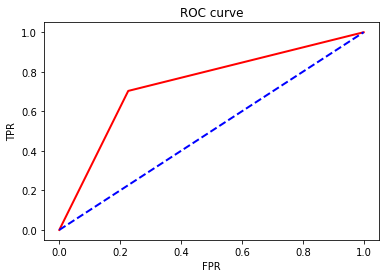

In [80]:
X = ['bed_number_True','accommodates','bathrooms','bed_type_Couch','bed_type_Futon','bed_type_Pull-out Sofa','bed_type_Real Bed']
model_logistic(X)

In [81]:
logistic_cross_validation(X)

K-fold cross-validation results:
LogisticRegression average accuracy is 0.748
LogisticRegression average log_loss is 0.534
LogisticRegression average auc is 0.794


###### Does the model make sense
Accuracy of the model is the highest i.e arount 75%<br>
Further, model has very good precsion and recall values.<br>
No Multicollinearity

###### Cross validating the model
Accuracy of the model is 75%
Auc of the Model is 0.79

###### Comparing Accuracy, AUC, Precison, Recall
Accuracy is good - 74.9%

Precision : 75%

Recall: 75%

AUC is 0.72 that means model is significant

### 2nd Model

Confusion Matrix: 
[[474 180]
 [ 57 365]]
Accuracy:  0.7797397769516728
AUC Score:  0.7948497760772207
Classification Report: 
              precision    recall  f1-score   support

       False       0.89      0.72      0.80       654
        True       0.67      0.86      0.75       422

   micro avg       0.78      0.78      0.78      1076
   macro avg       0.78      0.79      0.78      1076
weighted avg       0.81      0.78      0.78      1076



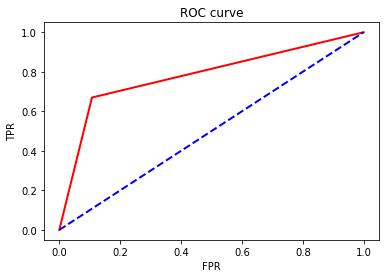

In [82]:
X = ['bed_number_True','accommodates','bathrooms','bedrooms','room_type_Private room','room_type_Shared room']
model_logistic(X)

In [83]:
logistic_cross_validation(X)

K-fold cross-validation results:
LogisticRegression average accuracy is 0.779
LogisticRegression average log_loss is 0.453
LogisticRegression average auc is 0.855


###### Does the model make sense
Accuracy of the model is the highest i.e arount 77%.<br>
Further, model has very good precsion and recall values.<br>
No Multicollinearity

###### Cross validating the model
Accuracy of the model is 77%
Auc of the Model is 0.85

###### Comparing Accuracy, AUC
Accuracy is good - 77.9%
Precision : 81%
Recall: 78%
AUC is 0.79 that means model is significant

### 3rd Model

Confusion Matrix: 
[[482 172]
 [ 57 365]]
Accuracy:  0.7871747211895911
AUC Score:  0.800965984028291
Classification Report: 
              precision    recall  f1-score   support

       False       0.89      0.74      0.81       654
        True       0.68      0.86      0.76       422

   micro avg       0.79      0.79      0.79      1076
   macro avg       0.79      0.80      0.78      1076
weighted avg       0.81      0.79      0.79      1076



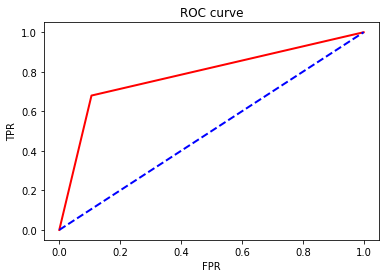

In [84]:
X = ['bed_number_True','accommodates','bathrooms','bedrooms','room_type_Private room','room_type_Shared room','property_type_Bed & Breakfast','property_type_Boat','property_type_Camper/RV','property_type_Condominium','property_type_Dorm','property_type_Entire Floor','property_type_Guesthouse','property_type_House','property_type_Loft','property_type_Other','property_type_Townhouse','property_type_Villa']
model_logistic(X)

In [85]:
logistic_cross_validation(X)

K-fold cross-validation results:
LogisticRegression average accuracy is 0.779
LogisticRegression average log_loss is 0.449
LogisticRegression average auc is 0.859


###### Does the model make sense
Accuracy of the model is the highest i.e arount 79%.<br>
Further, model has very good precsion and recall values.<br>
No Multicollinearity

###### Cross validating the model
Accuracy of the model is 79%
Auc of the Model is 0.85

###### Comparing Accuracy, AUC
Accuracy is highest among 3 models - 78.7%.
Precison - 81%
Recall - 79%
AUC is 0.80 that means model is significant


### Model Comparision

We would be comparing all the 3 models on the basis of below 2 factors:
1. Accuracy
2. AUC Score

**Model 1 :**
Accuracy : 0.75;
AUC Score:  0.73

**Model 2 :**
Accuracy : 0.78;
AUC Score : 0.79

**Model 3 :**
Accuracy : 0.79;
AUC Score : 0.80

Certainly we can deduce Model 3 is the best since the AUC & Accuracy along with the Precision and Recall are best among the aforementioned models

## MultiCollinearity

In [86]:
dataf = features.drop(["binary_price"],axis=1)

In [87]:
def vif_cal(dataframe, dependent_variable):
    import statsmodels.formula.api as smf
    x_var = dataframe.drop([dependent_variable],axis=1)
    xvar_name = x_var.columns
    for i in range(0,xvar_name.shape[0]):
        y = x_var[xvar_name[i]]
        x = x_var[xvar_name.drop(xvar_name[i])]
        rsq = smf.ols(formula="y~x", data = x_var).fit().rsquared
        vif=round(1/(1-rsq),2)
        print(xvar_name[i],"Vif = ", vif)

Variance Inflation Factor Identification Technique to calculate the multicollinearity among columns

In [88]:
vif_cal(dataf,'price')

bed_number_True Vif =  2.76
accommodates Vif =  4.37
bathrooms Vif =  1.41
bedrooms Vif =  2.61
beds Vif =  4.75
review_scores_rating Vif =  1.01
room_type_Private room Vif =  1.69
room_type_Shared room Vif =  1.29
bed_type_Couch Vif =  1.28
bed_type_Futon Vif =  2.28
bed_type_Pull-out Sofa Vif =  1.79
bed_type_Real Bed Vif =  3.39
property_type_Bed & Breakfast Vif =  1.03
property_type_Boat Vif =  1.03
property_type_Camper/RV Vif =  1.01
property_type_Condominium Vif =  1.03
property_type_Dorm Vif =  1.0
property_type_Entire Floor Vif =  1.0
property_type_Guesthouse Vif =  1.0
property_type_House Vif =  1.24
property_type_Loft Vif =  1.01
property_type_Other Vif =  1.11
property_type_Townhouse Vif =  1.03
property_type_Villa Vif =  1.0


Findings:

Of all values of VIF are near 1 indicates no collinearity between the predictor variables.<br>
VIF value <= 4 suggests no multicollinearity whereas a value of >= 10 implies serious multicollinearity.


Our model does not have high collinearity. Droping the 'bed', 'accomodates', 'bed_type_Real Bed' and 'bed_number_True' from the dataframe as these predictors have high vif compared to vif of other predictors.

##### Dropping 'beds'

In [89]:
dataf = dataf.drop(["beds"],axis=1)

In [90]:
vif_cal(dataf,'price')

bed_number_True Vif =  1.96
accommodates Vif =  3.3
bathrooms Vif =  1.41
bedrooms Vif =  2.55
review_scores_rating Vif =  1.01
room_type_Private room Vif =  1.69
room_type_Shared room Vif =  1.28
bed_type_Couch Vif =  1.28
bed_type_Futon Vif =  2.28
bed_type_Pull-out Sofa Vif =  1.79
bed_type_Real Bed Vif =  3.39
property_type_Bed & Breakfast Vif =  1.03
property_type_Boat Vif =  1.02
property_type_Camper/RV Vif =  1.01
property_type_Condominium Vif =  1.03
property_type_Dorm Vif =  1.0
property_type_Entire Floor Vif =  1.0
property_type_Guesthouse Vif =  1.0
property_type_House Vif =  1.23
property_type_Loft Vif =  1.01
property_type_Other Vif =  1.11
property_type_Townhouse Vif =  1.03
property_type_Villa Vif =  1.0


After dropping the independent variable 'beds', we can see the overall vif among the independent variables have reduced to permissible limit of less than 4.
Hence the linear model does not containg the muticollinearity.

In [91]:
X = df[['bed_number_True','accommodates','bathrooms','bedrooms','room_type_Private room','room_type_Shared room','property_type_Bed & Breakfast','property_type_Boat','property_type_Camper/RV','property_type_Condominium','property_type_Dorm','property_type_Entire Floor','property_type_Guesthouse','property_type_House','property_type_Loft','property_type_Other','property_type_Townhouse','property_type_Villa']]
model_regression(data=X)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     79.69
Date:                Mon, 25 Feb 2019   Prob (F-statistic):          1.97e-245
Time:                        22:17:36   Log-Likelihood:                -22403.
No. Observations:                3585   AIC:                         4.484e+04
Df Residuals:                    3566   BIC:                         4.496e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           101.4346      7.757     13.076      0.000      86.226     116.643
bed_number_True                   3.2267      8.831      0.365      0.715     -14.087      20.540
accommodates                      8.5629      2.140      4.002      0.000       4.368      12.758
bathrooms                        36.2944      4.969      7.305      0.000      26.553      46.036
bedrooms                         34.1057      4.446      7.671      0.000      25.389      42.823
room_type_Private room          -92.3534      5.577    -16.558      0.000    -103.289     -81.418
room_type_Shared room           -93.5715     14.877     -6.290      0.000    -122.740     -64.403
property_type_Bed & Breakfast    18.7491     19.995      0.938      0.348     -20.454      57.953
property_type_Boat               19.2322     36.708      0.524      0.600     -52.740      91.204
property_type_Camper/RV        -104.6015    126.390     -0.828      0.408    -352.405     143.202
property_type_Condominium         3.0119      8.635      0.349      0.727     -13.918      19.942
property_type_Dorm              -38.3885     88.903     -0.432      0.666    -212.695     135.918
property_type_Entire Floor      -65.6494     62.916     -1.043      0.297    -189.005      57.707
property_type_Guesthouse         48.8080    125.667      0.388      0.698    -197.578     295.194
property_type_House             -27.6163      6.393     -4.320      0.000     -40.151     -15.082
property_type_Loft                2.4669     20.274      0.122      0.903     -37.284      42.218
property_type_Other              50.2869     32.162      1.564      0.118     -12.771     113.345
property_type_Townhouse           5.4899     17.425      0.315      0.753     -28.674      39.653
property_type_Villa              43.0448     51.396      0.838      0.402     -57.723     143.813
==============================================================================
Omnibus:                     6487.287   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14616416.015
Skew:                          12.802   Prob(JB):                         0.00
Kurtosis:                     314.761   Cond. No.                         246.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
#Cross Validating the model
cross_validation(X)

R2 0.23799002305819514
Mean RMSE 116.91258044231174


We could see that even after dropping the independent predictor with largest vif, the R2 and RMSE of the model remains same.

## Regularization

Text(0.5, 1.0, 'Ridge Regression - Prices vs Predicted prices: $Y_i$ vs $\\hat{y}_i$')

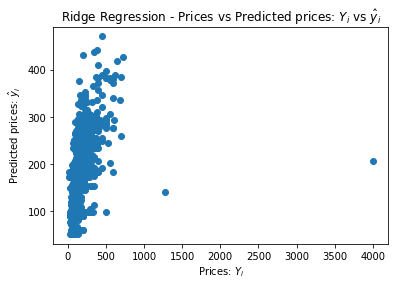

In [93]:
# Ridge regression with an alpha of 0.5
X = df[['bed_number_True','accommodates','bathrooms','bedrooms','beds','room_type_Private room','property_type_House']]
y = df.price
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
plt.title("Ridge Regression - Prices vs Predicted prices: $Y_i$ vs $\hat{y}_i$")

In [94]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(rmse)

145.57087973652597


In [95]:
# RMSE using 5-fold cross-validation
print("KfoldCrossVal mean score using Logistic regression is %s" %cross_val_score(ridge,X,y,cv=10).mean())

KfoldCrossVal mean score using Logistic regression is 0.2445793721590992


In [96]:
ridge.coef_

array([  1.15452654,   9.60096769,  41.3379246 ,  28.17485547,
         5.50720334, -83.45344926, -37.51962864])

In [97]:
alpha = np.linspace(.01,20,50)
t_rmse = np.array([])
cv_rmse = np.array([])

print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_cv\n')

for a in alpha:
    ridge = Ridge(fit_intercept=True, alpha=a)  
    # computing the RMSE on training data
    ridge.fit(X,y)
    y_pred = ridge.predict(X)
    err = y_pred-y    
    # Dot product of error vector with itself gives us the sum of squared errors
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(y_pred))

    # computing RMSE using 5-fold cross validation
    kf = KFold(5,shuffle=True)
    xval_err = 0
    for train, test in kf.split(X):
        ridge.fit(X_train, y_train)
        y_pred = ridge.predict(X_test)
        err = y_pred - y_test
        xval_err += np.dot(err,err)
    rmse_cv = np.sqrt(xval_err/len(X))
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_cv))

Ridge Regression
alpha	 RMSE_train	 RMSE_cv

0.010	 125.9975		 178.3300
0.418	 125.9975		 178.3288
0.826	 125.9975		 178.3277
1.234	 125.9975		 178.3267
1.642	 125.9976		 178.3256
2.050	 125.9976		 178.3245
2.458	 125.9976		 178.3235
2.866	 125.9977		 178.3225
3.274	 125.9977		 178.3214
3.682	 125.9978		 178.3204
4.090	 125.9978		 178.3195
4.498	 125.9979		 178.3185
4.906	 125.9979		 178.3175
5.313	 125.9980		 178.3166
5.721	 125.9981		 178.3157
6.129	 125.9982		 178.3147
6.537	 125.9983		 178.3138
6.945	 125.9984		 178.3129
7.353	 125.9984		 178.3121
7.761	 125.9986		 178.3112
8.169	 125.9987		 178.3104
8.577	 125.9988		 178.3095
8.985	 125.9989		 178.3087
9.393	 125.9990		 178.3079
9.801	 125.9992		 178.3071
10.209	 125.9993		 178.3063
10.617	 125.9994		 178.3056
11.025	 125.9996		 178.3048
11.433	 125.9997		 178.3041
11.841	 125.9999		 178.3034
12.249	 126.0001		 178.3026
12.657	 126.0002		 178.3019
13.065	 126.0004		 178.3013
13.473	 126.0006		 178.3006
13.881	 126.0008		 178.2999


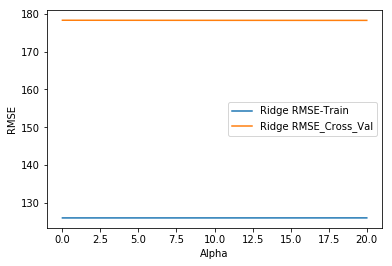

In [98]:
plt.plot(alpha, t_rmse, label='RMSE-Train')
plt.plot(alpha, cv_rmse, label='RMSE_Cross_Val')
plt.legend( ('Ridge RMSE-Train', 'Ridge RMSE_Cross_Val') )
plt.ylabel('RMSE')
plt.xlabel('Alpha')
plt.show()

In [99]:
#Function for Ridge Regression & linear regression model
def calculate_ridge(feature_cols):
    """
     create the ridge regression model on given data
     param feature_cols: independent predictors
     return: predictive model
    """
    X = df[feature_cols]
    y = df.price
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    lr_pred = lr.predict(X_test)
    ridge_test_pred = []
    for alpha in [0.0,0.25,0.5,1,2,3,4]:
        rr = Ridge(alpha=alpha)
        rr.fit(X_train, y_train)
        test_score=lr.score(X_test, y_test)
        Ridge_train_score = rr.score(X_train,y_train)
        Ridge_test_score = rr.score(X_test, y_test)
        ridge_test_pred.append(rr.predict(X_test))
        print("linear regression test score:", test_score)
        print("ridge regression test score alpha=", alpha, ": " ,Ridge_test_score)       
        
    ridge_mse_test = [mean_squared_error(y_test, p) for p in ridge_test_pred]
    ols_mse = mean_squared_error(y_test, lr_pred)

    # plot mse
    plt.plot(ridge_mse_test[:25], 'ro')
    plt.axhline(y=ols_mse, color='g', linestyle='--')
    plt.title("Ridge Test Set MSE", fontsize=16)
    plt.xlabel("Model Simplicity$\longrightarrow$")
    plt.ylabel("MSE")

linear regression test score: 0.22265635972551812
ridge regression test score alpha= 0.0 :  0.22265635972551812
linear regression test score: 0.22265635972551812
ridge regression test score alpha= 0.25 :  0.22265095064033902
linear regression test score: 0.22265635972551812
ridge regression test score alpha= 0.5 :  0.22264531130127274
linear regression test score: 0.22265635972551812
ridge regression test score alpha= 1 :  0.22263336707924028
linear regression test score: 0.22265635972551812
ridge regression test score alpha= 2 :  0.2226069831563754
linear regression test score: 0.22265635972551812
ridge regression test score alpha= 3 :  0.22257756556451813
linear regression test score: 0.22265635972551812
ridge regression test score alpha= 4 :  0.22254543342716004


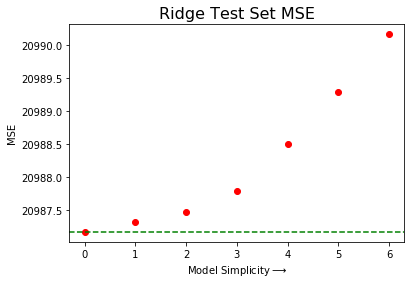

In [100]:
calculate_ridge(feature_cols=['bed_number_True','accommodates','bathrooms','bedrooms','room_type_Private room','room_type_Shared room'])

## Conclusion:
<ul>
<li>We have created 3 predictive model using linear regression to predict the target variable 'price'. A best model is selected with highest Adjusted R2, lower AIC & BIC values, lower Root Mean Squared values.<br>
    Best predictive linear model has <b>Adj. R-squared</b> 0.283, <b>AIC</b> 4.484e+04, <b>BIC</b> 4.496e+04 <b>RMSE</b> 116.91258044231174</li>

<li>
Interaction effect is added on the 3 linear models to study the synergy effect and to strengthen the predictive model.<br>
Interaction of independent predictors with highest correaltion among them is choosen i.e. accommodates, bedrooms & beds. 
</li>
<li>
Further, We have created 3 predictive model using logistic regression to predict the target variable 'binary_price'. A best model is selected with highest Accuracy, Highest Precision & Recall values , Highest AUC score.<br>
Model with <b>Accuracy</b> 0.79 and <b>AUC Score</b> 0.80 is considered best.
</li>
<li>
Variance Inflation Factor Identification Technique is employed to calculate the vif of each predictor. Considering the values of vif, we can conclude that our models do not have multicollinearity.<br>
All the independent predictors have vif value less than 5.
</li>
<li>
Ridge Regression is used to avoid the problem of overfitting.
</li>
</ul>

## Contributions

Following are the contributions made:<br>
1. EDA is performed on the dataset and NaN values are being replaced with mean/median values.
2. Dummy variable are created for categorical variables.
3. Created the 3 predictive models using stats.api model and then cross validated the each model using k-fold cross validation method.
4. R2, AIC, BIC & Root Mean Square Error are calculated to get the best linear predictive model.
5. Interaction effect is added to all the 3 linear models to strengthen the predictive models.
6. Created the 3 predictive models using sklearn logistic model and then cross validated the each model using k-fold cross validation method.
7. Accuracy, AUC, Precision & Recall are calculated to get the best logistic predictive model.
8. Ridge Regression is used and several values of lambda is employed to study the effect of lambda on the model.

## Citations


Linear Regression <a href='https://github.com/nikbearbrown/INFO_6105/blob/master/Week_2/NBB_Linear_Regression.ipynb'> Click Here</a><br>
Logistic Regression <a href="https://github.com/nikbearbrown/INFO_6105/blob/master/Week_2/NBB_Logistic_Regression.ipynb">Click here</a><br>
Logistic Regression Metrics <a href ='https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python'>Click here</a><br>
Ridge Regression <a href='https://github.com/nikbearbrown/INFO_6105/blob/master/Week_2/NBB_Regularization.ipynb'>Click Here</a><br>
Assumption of linear Model <a href="http://www.statisticssolutions.com/assumptions-of-linear-regression/">Click here</a><br>
Assumptions of Logistic Regression<a href="https://www.statisticssolutions.com/assumptions-of-logistic-regression/">Click here</a><br>
AIC Metrics<a href="https://en.wikipedia.org/wiki/Akaike_information_criterion">Click here</a><br>
BIC Metrics<a href="https://en.wikipedia.org/wiki/Bayesian_information_criterion">Click here</a><br>

## License
MIT Licence<br>
Copyright 2019 Sarthak Goel<br><br>
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.